In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv('sl_weather.csv', encoding='utf-8')
df.head()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [3]:
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame to keep only rows with dates after '2020-01-01'
df = df[df['time'] >= pd.to_datetime('2020-01-01')]

In [4]:
df.head(10)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
3652,2020-01-01,51,30.2,23.7,26.9,36.5,28.7,32.4,2020-01-01T00:51,2020-01-01T12:35,...,7.0,6.5,20.2,307,3.93,7.0,79.899994,16.0,Sri Lanka,Colombo
3653,2020-01-02,61,30.5,23.9,26.5,37.1,29.2,32.2,2020-01-02T00:52,2020-01-02T12:36,...,7.0,6.6,24.1,111,3.38,7.0,79.899994,16.0,Sri Lanka,Colombo
3654,2020-01-03,51,30.0,23.5,27.0,36.9,28.5,32.7,2020-01-03T00:52,2020-01-03T12:36,...,6.0,8.7,20.5,243,3.98,7.0,79.899994,16.0,Sri Lanka,Colombo
3655,2020-01-04,53,30.3,24.4,26.9,37.4,29.5,32.7,2020-01-04T00:53,2020-01-04T12:37,...,7.0,8.6,24.8,172,4.02,7.0,79.899994,16.0,Sri Lanka,Colombo
3656,2020-01-05,51,30.7,23.6,27.3,36.6,28.6,32.7,2020-01-05T00:53,2020-01-05T12:37,...,2.0,7.5,19.1,204,4.08,7.0,79.899994,16.0,Sri Lanka,Colombo
3657,2020-01-06,51,31.7,23.5,27.5,37.1,28.4,32.1,2020-01-06T00:54,2020-01-06T12:38,...,1.0,8.2,21.6,27,4.42,7.0,79.899994,16.0,Sri Lanka,Colombo
3658,2020-01-07,2,31.2,24.7,27.4,36.3,28.7,31.6,2020-01-07T00:54,2020-01-07T12:38,...,0.0,11.6,22.3,27,4.17,7.0,79.899994,16.0,Sri Lanka,Colombo
3659,2020-01-08,51,30.8,23.1,27.0,35.0,26.0,30.4,2020-01-08T00:54,2020-01-08T12:39,...,1.0,10.4,25.6,20,4.35,7.0,79.899994,16.0,Sri Lanka,Colombo
3660,2020-01-09,1,31.2,22.6,26.6,34.4,25.7,29.7,2020-01-09T00:55,2020-01-09T12:39,...,0.0,11.9,25.6,17,4.74,7.0,79.899994,16.0,Sri Lanka,Colombo
3661,2020-01-10,51,30.9,22.4,26.7,34.8,25.2,30.0,2020-01-10T00:55,2020-01-10T12:40,...,1.0,10.5,20.9,6,3.99,7.0,79.899994,16.0,Sri Lanka,Colombo


In [5]:
import pandas as pd



# Grouping the DataFrame by 'city'
grouped = df.groupby('city')

# Creating a dictionary to store dataframes for each city
city_dataframes = {}

# Iterating over each city and its corresponding dataframe
for city, city_df in grouped:
    city_dataframes[city] = city_df


# Accessing data for a specific city, for example, 'New York'




In [6]:
#seperate the datafrmes by city 

for city_name, city_df in city_dataframes.items():
    globals()[city_name] = city_df
    print(f"succeffully creatd the dataframe by city which is : {city_name}")


succeffully creatd the dataframe by city which is : Athurugiriya
succeffully creatd the dataframe by city which is : Badulla
succeffully creatd the dataframe by city which is : Bentota
succeffully creatd the dataframe by city which is : Colombo
succeffully creatd the dataframe by city which is : Galle
succeffully creatd the dataframe by city which is : Gampaha
succeffully creatd the dataframe by city which is : Hambantota
succeffully creatd the dataframe by city which is : Hatton
succeffully creatd the dataframe by city which is : Jaffna
succeffully creatd the dataframe by city which is : Kalmunai
succeffully creatd the dataframe by city which is : Kalutara
succeffully creatd the dataframe by city which is : Kandy
succeffully creatd the dataframe by city which is : Kesbewa
succeffully creatd the dataframe by city which is : Kolonnawa
succeffully creatd the dataframe by city which is : Kurunegala
succeffully creatd the dataframe by city which is : Mabole
succeffully creatd the dataframe

In [7]:
Gampaha.head(10)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
87224,2020-01-01,51,30.6,23.7,26.9,37.3,28.9,32.6,2020-01-01T00:51,2020-01-01T12:34,...,7.0,6.4,20.2,289,4.04,7.099998,80.0,15.0,Sri Lanka,Gampaha
87225,2020-01-02,61,30.6,23.9,26.6,37.3,29.0,32.3,2020-01-02T00:52,2020-01-02T12:35,...,6.0,5.9,20.9,41,3.49,7.099998,80.0,15.0,Sri Lanka,Gampaha
87226,2020-01-03,51,30.4,24.2,27.1,36.8,29.4,32.8,2020-01-03T00:52,2020-01-03T12:35,...,3.0,7.6,19.1,235,4.05,7.099998,80.0,15.0,Sri Lanka,Gampaha
87227,2020-01-04,51,30.7,23.7,26.9,37.7,28.6,32.6,2020-01-04T00:52,2020-01-04T12:36,...,7.0,6.1,21.6,177,4.04,7.099998,80.0,15.0,Sri Lanka,Gampaha
87228,2020-01-05,2,31.5,22.9,27.3,37.5,27.4,32.8,2020-01-05T00:53,2020-01-05T12:36,...,0.0,7.0,18.7,72,4.24,7.099998,80.0,15.0,Sri Lanka,Gampaha
87229,2020-01-06,1,31.9,22.5,27.4,36.2,26.7,31.2,2020-01-06T00:53,2020-01-06T12:37,...,0.0,12.1,27.4,27,4.78,7.099998,80.0,15.0,Sri Lanka,Gampaha
87230,2020-01-07,1,31.4,24.6,27.3,35.5,27.9,30.8,2020-01-07T00:54,2020-01-07T12:37,...,0.0,16.1,29.9,27,4.45,7.099998,80.0,15.0,Sri Lanka,Gampaha
87231,2020-01-08,1,30.9,22.8,26.9,34.3,25.4,29.6,2020-01-08T00:54,2020-01-08T12:38,...,0.0,16.5,35.3,22,4.78,7.099998,80.0,15.0,Sri Lanka,Gampaha
87232,2020-01-09,1,31.3,22.4,26.5,34.0,25.2,29.1,2020-01-09T00:54,2020-01-09T12:38,...,0.0,14.9,31.3,17,5.13,7.099998,80.0,15.0,Sri Lanka,Gampaha
87233,2020-01-10,3,31.1,21.9,26.4,35.2,24.6,29.6,2020-01-10T00:55,2020-01-10T12:39,...,0.0,12.2,22.0,19,4.36,7.099998,80.0,15.0,Sri Lanka,Gampaha


In [8]:
df['city'].unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

we are going to perform time serires anlaysis with cmd plots


In [9]:
Badulla.shape

(1264, 24)

In [10]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

In [11]:
# Convert 'time' column to datetime
Ratnapura['time'] = pd.to_datetime(Ratnapura['time'])

# Group by week and calculate mean rainfall
Ratnapura['average_rainfall_by_week'] = Ratnapura.groupby(pd.Grouper(key='time', freq='W'))['rain_sum'].transform('mean')

In [12]:
Ratnapura.head(10)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city,average_rainfall_by_week
28232,2020-01-01,51,29.5,22.1,25.5,35.2,26.5,30.6,2020-01-01T00:49,2020-01-01T12:33,...,6.3,23.4,64,3.82,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000
28233,2020-01-02,53,28.8,22.4,25.2,35.0,26.7,30.5,2020-01-02T00:49,2020-01-02T12:34,...,4.2,31.7,85,3.15,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000
28234,2020-01-03,51,29.6,21.9,25.7,35.7,26.0,31.0,2020-01-03T00:50,2020-01-03T12:34,...,6.3,22.7,82,3.85,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000
28235,2020-01-04,51,29.3,22.1,25.5,36.7,26.1,30.9,2020-01-04T00:50,2020-01-04T12:35,...,5.6,20.9,110,4.06,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000
28236,2020-01-05,51,29.4,21.5,25.5,36.2,25.3,30.7,2020-01-05T00:50,2020-01-05T12:35,...,4.5,18.7,131,3.98,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000
28237,2020-01-06,51,30.2,20.9,26.2,36.3,24.4,31.1,2020-01-06T00:51,2020-01-06T12:36,...,5.2,22.7,78,4.28,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714
28238,2020-01-07,3,29.7,23.6,26.1,35.6,27.9,31.2,2020-01-07T00:51,2020-01-07T12:36,...,4.1,22.7,80,3.86,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714
28239,2020-01-08,51,29.5,21.2,25.4,35.0,24.8,30.1,2020-01-08T00:52,2020-01-08T12:37,...,5.4,16.6,6,3.70,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714
28240,2020-01-09,2,29.7,20.6,25.4,35.3,23.9,29.7,2020-01-09T00:52,2020-01-09T12:37,...,6.6,16.2,131,4.24,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714
28241,2020-01-10,51,28.9,20.3,24.8,34.7,23.2,29.2,2020-01-10T00:52,2020-01-10T12:38,...,5.2,19.8,214,3.58,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714


In [13]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

Text(0, 0.5, 'rain_sum')

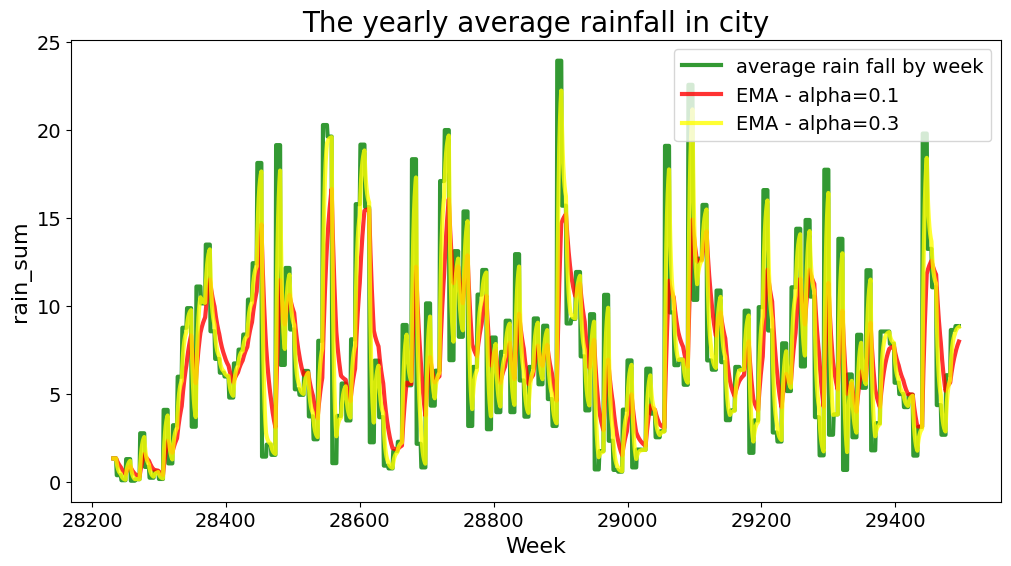

In [14]:
#performing the SMA analysis in for ratnapura 
Ratnapura['EMA_0.1'] = Ratnapura.average_rainfall_by_week.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
Ratnapura['EMA_0.3'] = Ratnapura.average_rainfall_by_week.ewm(alpha=0.3, adjust=False).mean()

# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
Ratnapura[['average_rainfall_by_week', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['average rain fall by week', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The yearly average rainfall in city', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('rain_sum', fontsize=16)

In [15]:
# performing ADF for test the stationarity

import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Perform ADF test
result = adfuller(Ratnapura['average_rainfall_by_week'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -5.4731775424274165
p-value: 2.3734932962496855e-06
Critical Values:
   1%: -3.4356260602190356
   5%: -2.863869899335344
   10%: -2.5680104683371323


In [16]:
# Based on the results of your Augmented Dickey-Fuller (ADF) test:

# ADF Statistic: -5.4731775424274165
# p-value: 2.3734932962496855e-06
# Critical Values:
# 1%: -3.4356260602190356
# 5%: -2.863869899335344
# 10%: -2.5680104683371323
# The ADF statistic is -5.4731775424274165, which is more negative than all the critical values provided at the 1%, 5%, and 10% significance levels. Additionally, the p-value is extremely small (2.37e-06), indicating strong evidence against the null hypothesis of a unit root (i.e., non-stationarity).

# Based on these results, you can confidently reject the null hypothesis and conclude that the data is likely stationary. Therefore, in this context, the ADF statistic of -5.4731775424274165 is indicative of good results, as it suggests that the data is stationary.

Text(0, 0.5, 'Temperature [°C]')

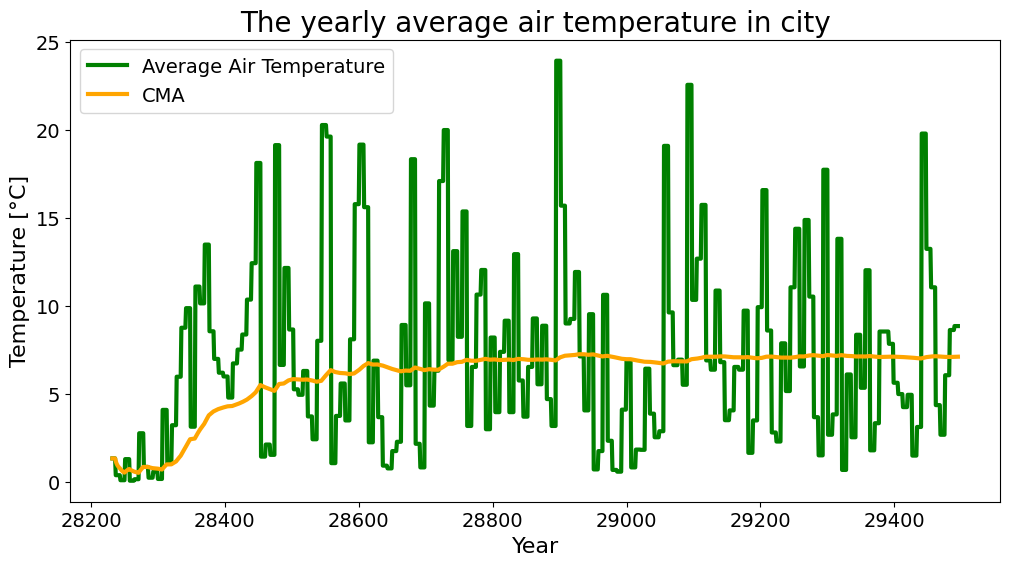

In [17]:
Ratnapura['CMA'] = Ratnapura.average_rainfall_by_week.expanding().mean()

# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']
# line plot
Ratnapura[['average_rainfall_by_week', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Air Temperature', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

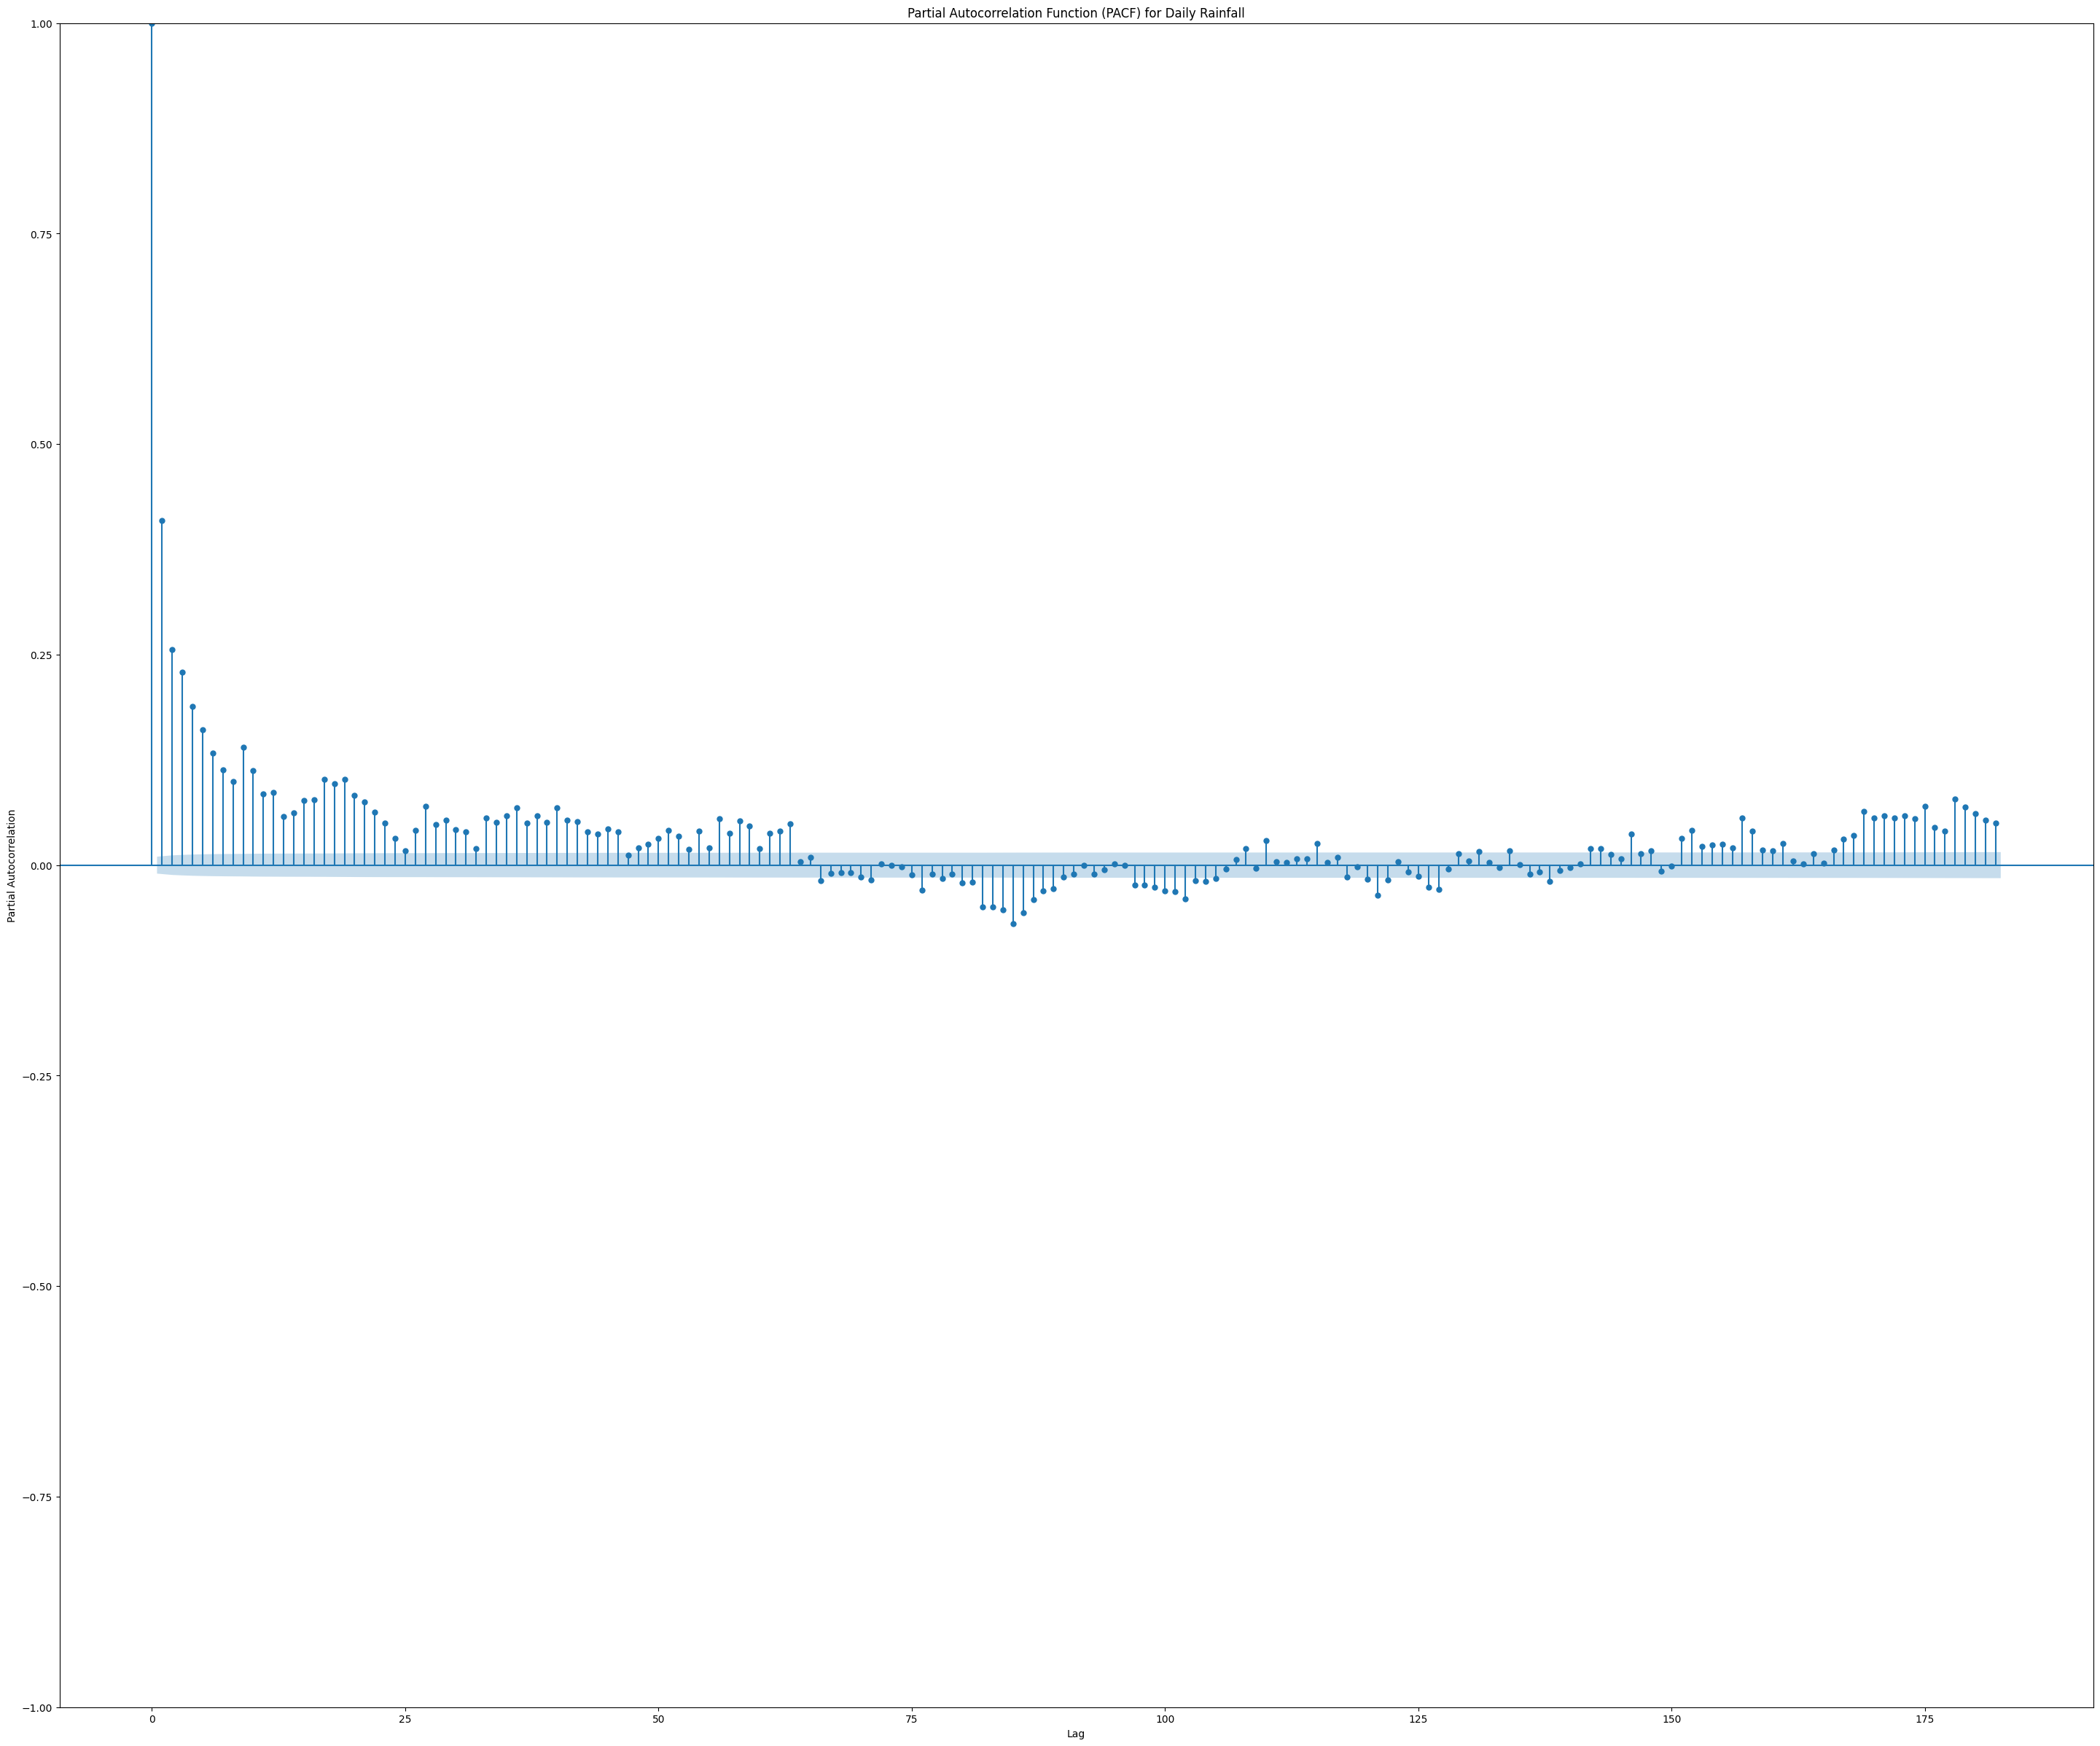

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Ensure that df['rain_sum'] contains valid data
if 'rain_sum' not in df.columns or df['rain_sum'].isnull().any():
    print("Error: 'rain_sum' column is missing or contains NaN values.")
else:
    # Plot PACF for daily rainfall
    fig, ax = plt.subplots(figsize=(36, 30))
    plot_acf(df['rain_sum'], lags=182, ax=ax)  # Adjust lags as needed
    ax.set_title('Partial Autocorrelation Function (PACF) for Daily Rainfall')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()



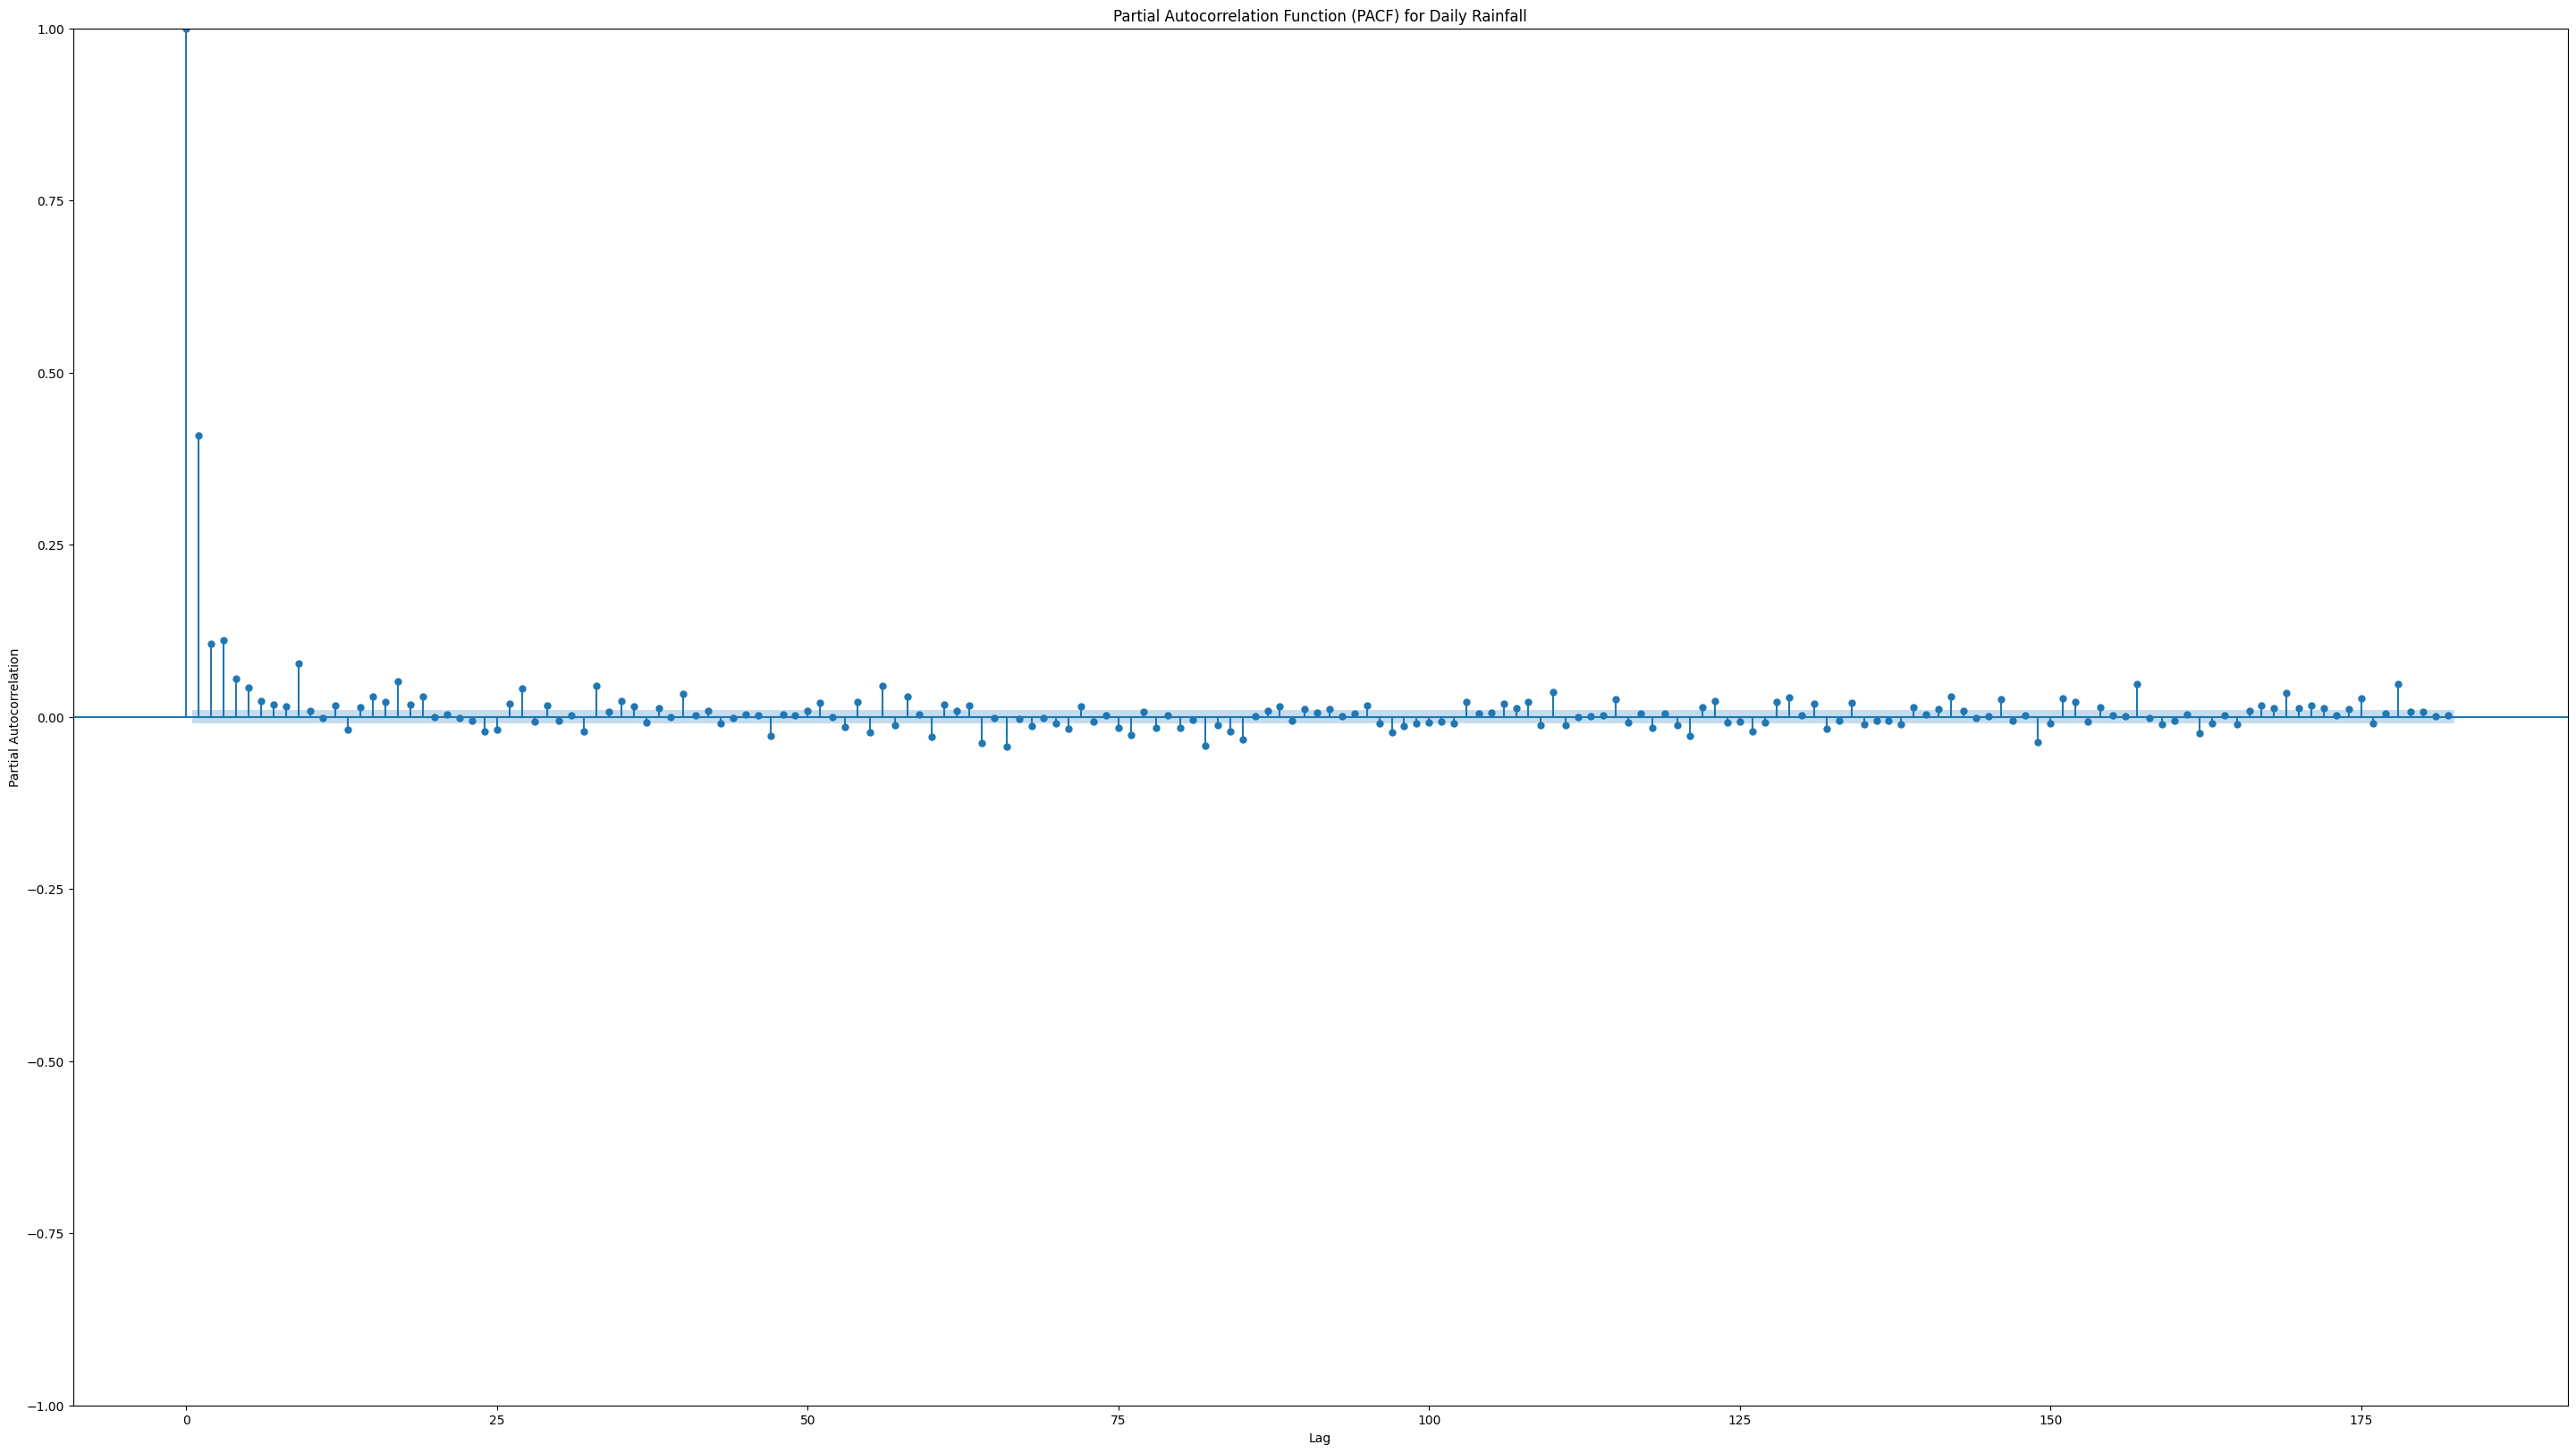

In [19]:
# Plot PACF for daily rainfall
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Ensure that df['rain_sum'] contains valid data
if 'rain_sum' not in df.columns or df['rain_sum'].isnull().any():
    print("Error: 'rain_sum' column is missing or contains NaN values.")
else:
    # Plot PACF for daily rainfall
    fig, ax = plt.subplots(figsize=(36, 20))
    plot_pacf(df['rain_sum'], lags=182, ax=ax)  # Adjust lags as needed
    ax.set_title('Partial Autocorrelation Function (PACF) for Daily Rainfall')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    plt.show()



In [20]:
train_data_ratnapura = Ratnapura.iloc[:int(0.8*len(df))]
test_data_ratnapura = Ratnapura.iloc[int(0.8*len(df)):]

In [21]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

In [22]:
# Assuming 'df' is your DataFrame containing the time series data
# Convert the index to a DateTimeIndex
Ratnapura['time'] = pd.to_datetime(Ratnapura['time'])
Ratnapura.set_index('time', inplace=True)
print(Ratnapura.index)


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17'],
              dtype='datetime64[ns]', name='time', length=1264, freq=None)


In [23]:
Ratnapura.head(10)

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,...,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city,average_rainfall_by_week,EMA_0.1,EMA_0.3,CMA
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01,51,29.5,22.1,25.5,35.2,26.5,30.6,2020-01-01T00:49,2020-01-01T12:33,19.17,...,3.82,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000,1.340000,1.340000,1.340000
2020-01-02,53,28.8,22.4,25.2,35.0,26.7,30.5,2020-01-02T00:49,2020-01-02T12:34,15.68,...,3.15,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000,1.340000,1.340000,1.340000
2020-01-03,51,29.6,21.9,25.7,35.7,26.0,31.0,2020-01-03T00:50,2020-01-03T12:34,19.41,...,3.85,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000,1.340000,1.340000,1.340000
2020-01-04,51,29.3,22.1,25.5,36.7,26.1,30.9,2020-01-04T00:50,2020-01-04T12:35,20.26,...,4.06,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000,1.340000,1.340000,1.340000
2020-01-05,51,29.4,21.5,25.5,36.2,25.3,30.7,2020-01-05T00:50,2020-01-05T12:35,19.80,...,3.98,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,1.340000,1.340000,1.340000,1.340000
2020-01-06,51,30.2,20.9,26.2,36.3,24.4,31.1,2020-01-06T00:51,2020-01-06T12:36,21.31,...,4.28,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714,1.244571,1.053714,1.180952
2020-01-07,3,29.7,23.6,26.1,35.6,27.9,31.2,2020-01-07T00:51,2020-01-07T12:36,19.09,...,3.86,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714,1.158686,0.853314,1.067347
2020-01-08,51,29.5,21.2,25.4,35.0,24.8,30.1,2020-01-08T00:52,2020-01-08T12:37,18.32,...,3.70,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714,1.081389,0.713034,0.982143
2020-01-09,2,29.7,20.6,25.4,35.3,23.9,29.7,2020-01-09T00:52,2020-01-09T12:37,21.44,...,4.24,6.800003,80.30002,27.0,Sri Lanka,Ratnapura,0.385714,1.011821,0.614838,0.915873


In [24]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2020-01-01 to 2023-06-17
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   weathercode                 1264 non-null   int64  
 1   temperature_2m_max          1264 non-null   float64
 2   temperature_2m_min          1264 non-null   float64
 3   temperature_2m_mean         1264 non-null   float64
 4   apparent_temperature_max    1264 non-null   float64
 5   apparent_temperature_min    1264 non-null   float64
 6   apparent_temperature_mean   1264 non-null   float64
 7   sunrise                     1264 non-null   object 
 8   sunset                      1264 non-null   object 
 9   shortwave_radiation_sum     1264 non-null   float64
 10  precipitation_sum           1264 non-null   float64
 11  rain_sum                    1264 non-null   float64
 12  snowfall_sum                1264 non-null   float64
 13  precipitation_h

Lets Perform the SARIMAX MODEL using another impoortant features as well

In [25]:
#create target variable and another iportnatn features using the heatmap


endog_data = Ratnapura['rain_sum']
exog_data = Ratnapura[['EMA_0.1', 'EMA_0.3' ,'shortwave_radiation_sum','precipitation_hours','et0_fao_evapotranspiration']]

In [26]:
exog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2020-01-01 to 2023-06-17
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EMA_0.1                     1264 non-null   float64
 1   EMA_0.3                     1264 non-null   float64
 2   shortwave_radiation_sum     1264 non-null   float64
 3   precipitation_hours         1264 non-null   float64
 4   et0_fao_evapotranspiration  1264 non-null   float64
dtypes: float64(5)
memory usage: 59.2 KB


In [27]:
# Assuming you want to use the first 80% of the data for training and the rest for testing
train_size = int(len(Ratnapura) * 0.75)
train_endog, test_endog = endog_data[:train_size], endog_data[train_size:]
train_exog, test_exog = exog_data[:train_size], exog_data[train_size:]

In [28]:
p, d, q = 1, 0, 7 # ARIMA parameters
P, D, Q, s =7, 0, 7, 182   # Seasonal parameters


# Initialize SARIMAX model with proper index
model = SARIMAX(endog=train_endog, exog=train_exog, order=(p, d, q), seasonal_order=(P, D, Q, s) , freq='D')

# Fit SARIMAX model
result = model.fit()

c:\Users\kasrs\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kasrs\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Make predictions for the test set
predictions = result.predict(start=len(train_endog), end=len(train_endog) + len(test_endog) - 1, exog=test_exog)


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(test_endog, predictions)
mae = mean_absolute_error(test_endog, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 69.10059107733655
Mean Absolute Error: 6.073680068945257


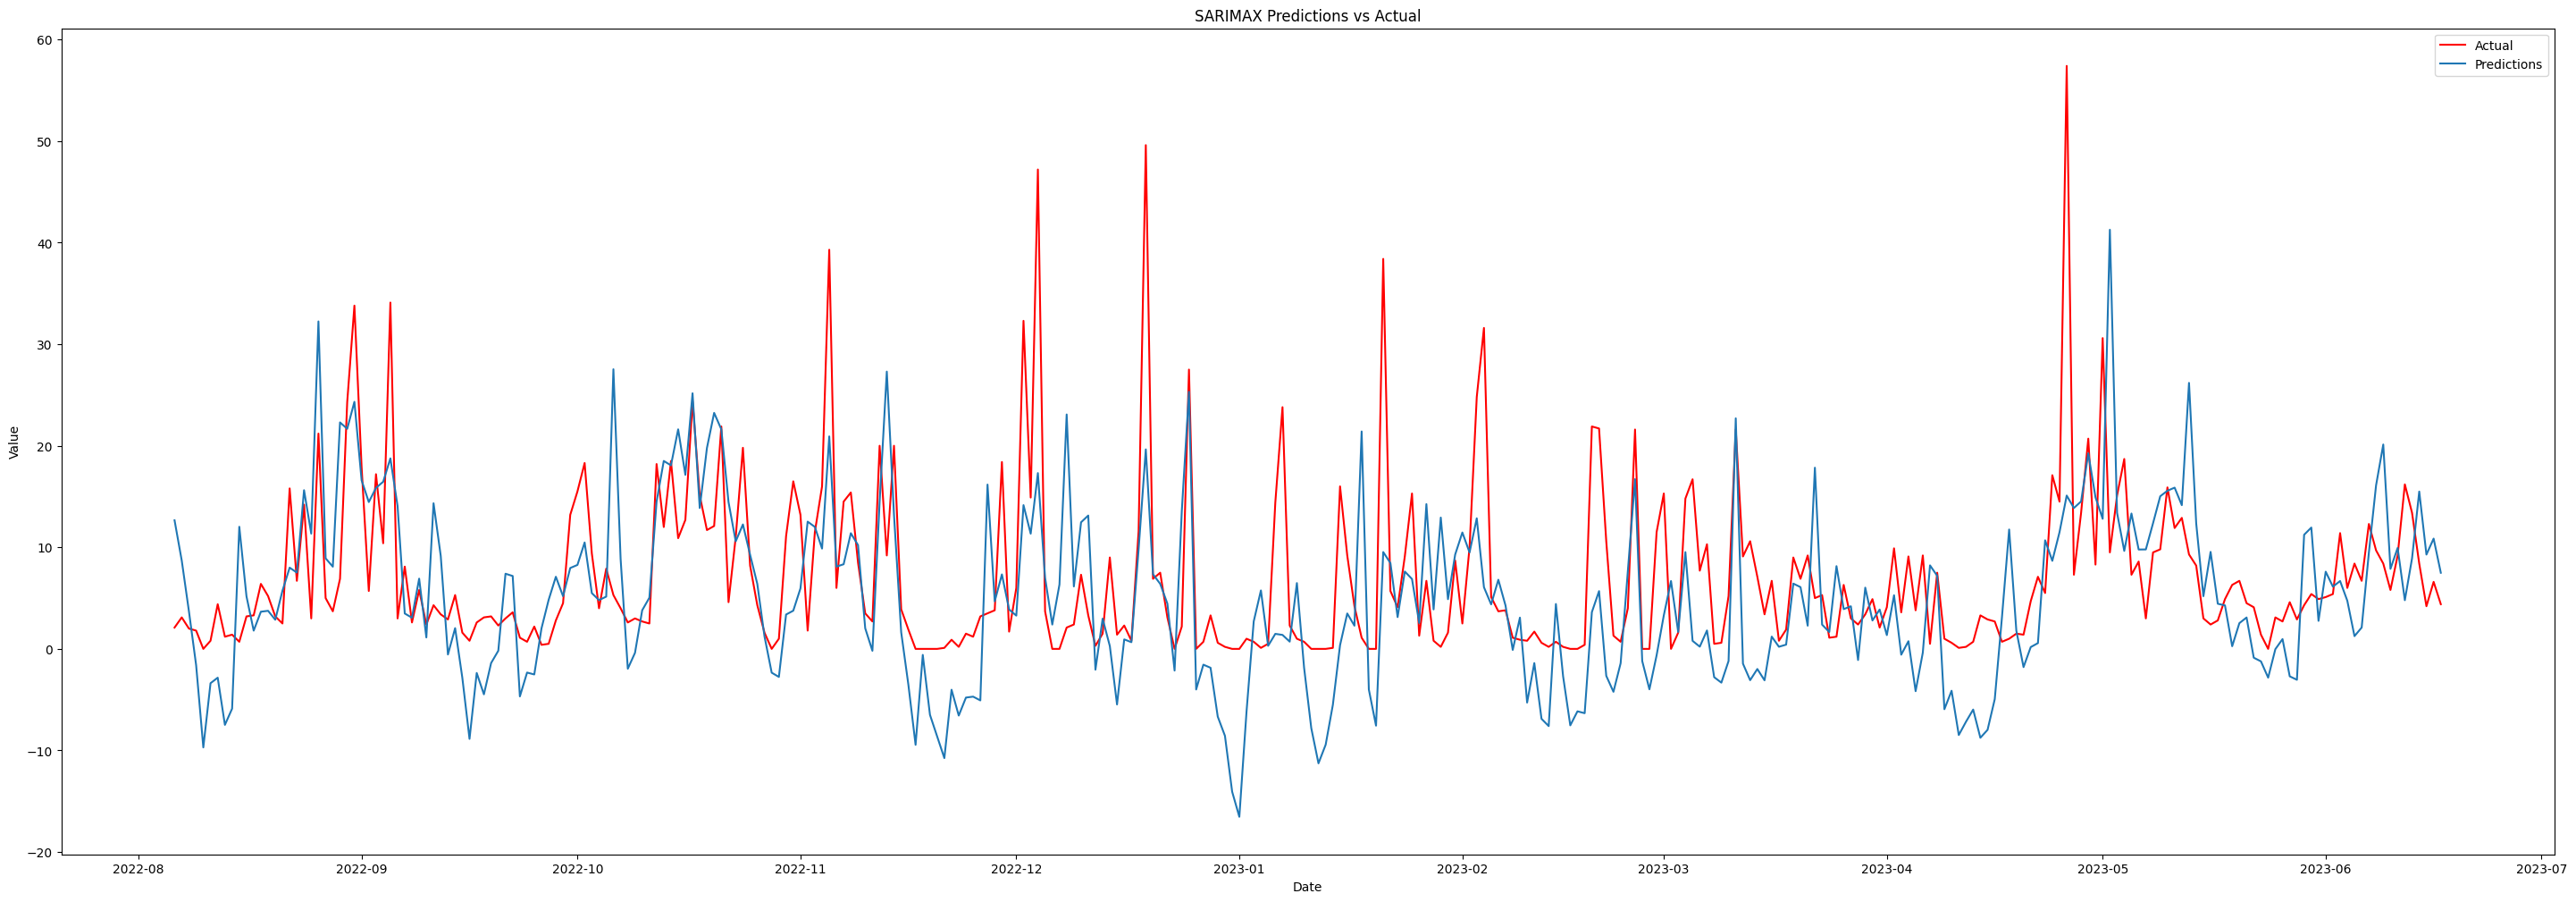

In [ ]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(36, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, test_endog, label='Actual' , color='red')
plt.plot(test_endog.index, predictions, label='Predictions')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

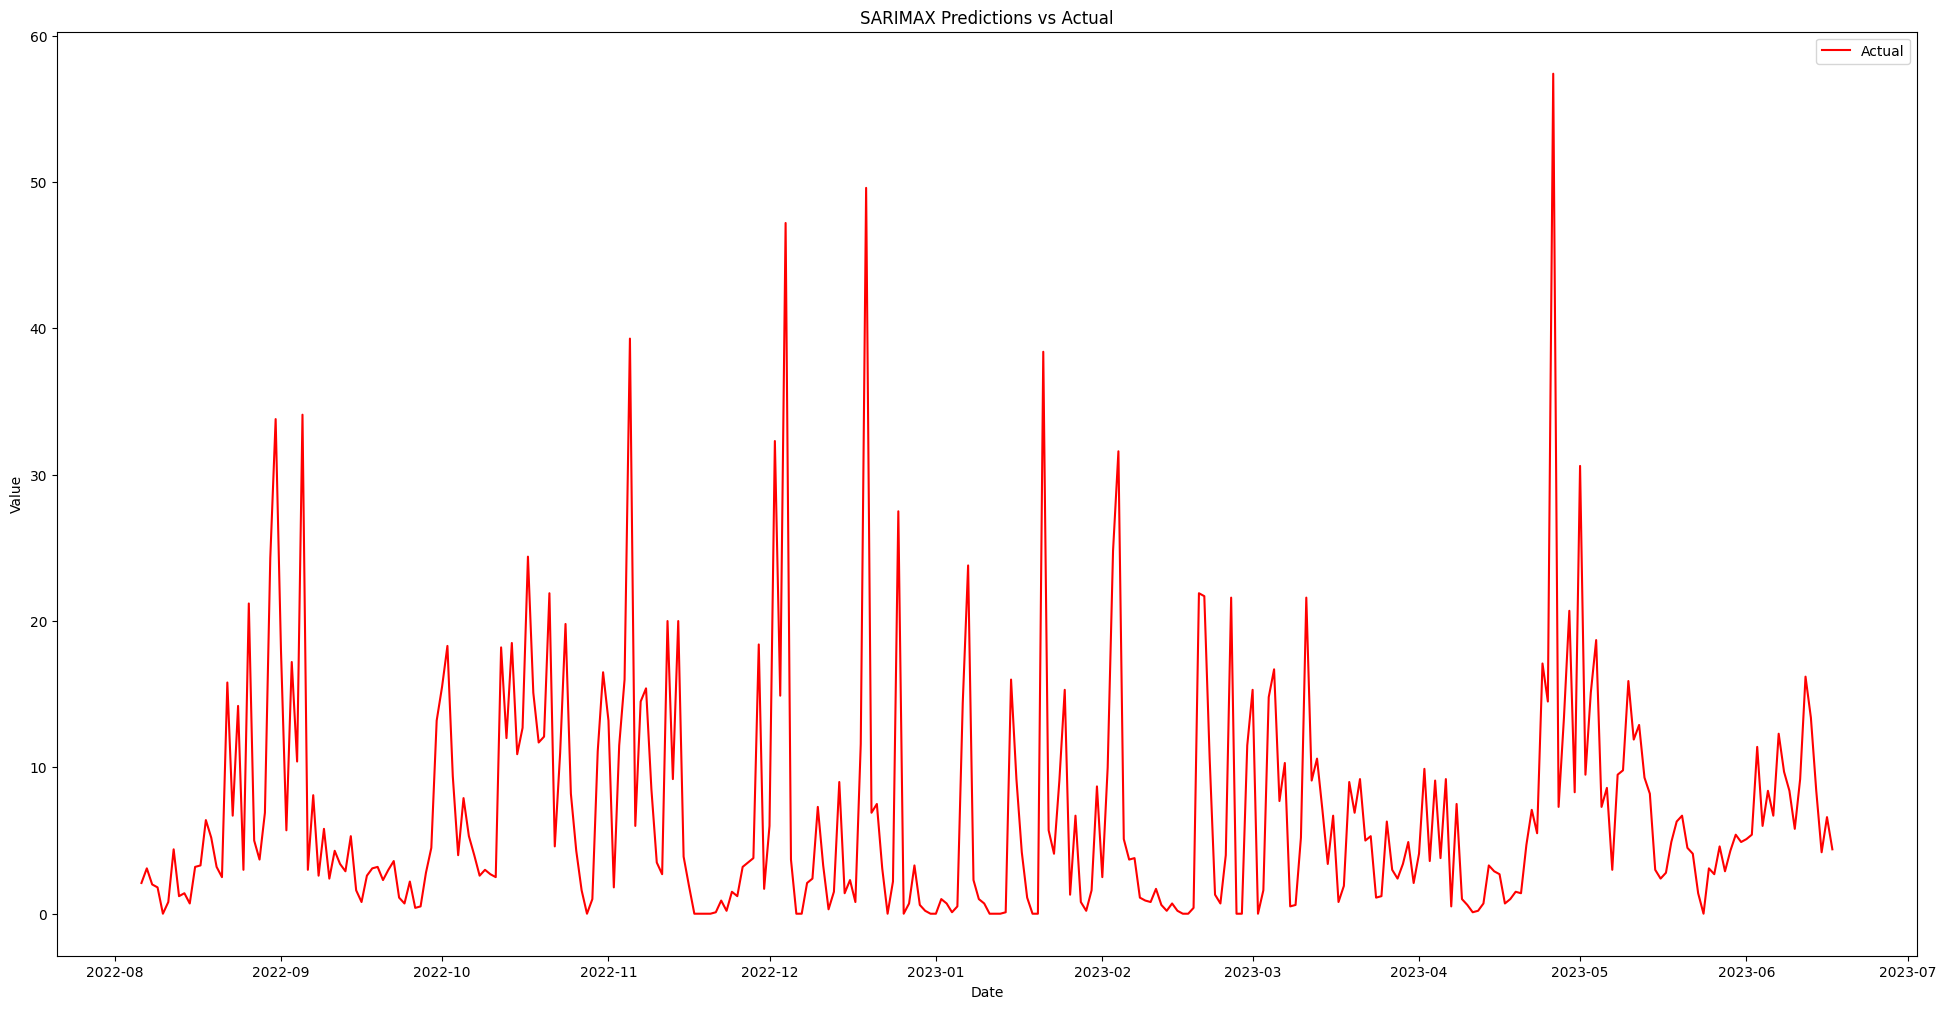

In [ ]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, test_endog, label='Actual' , color='red')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

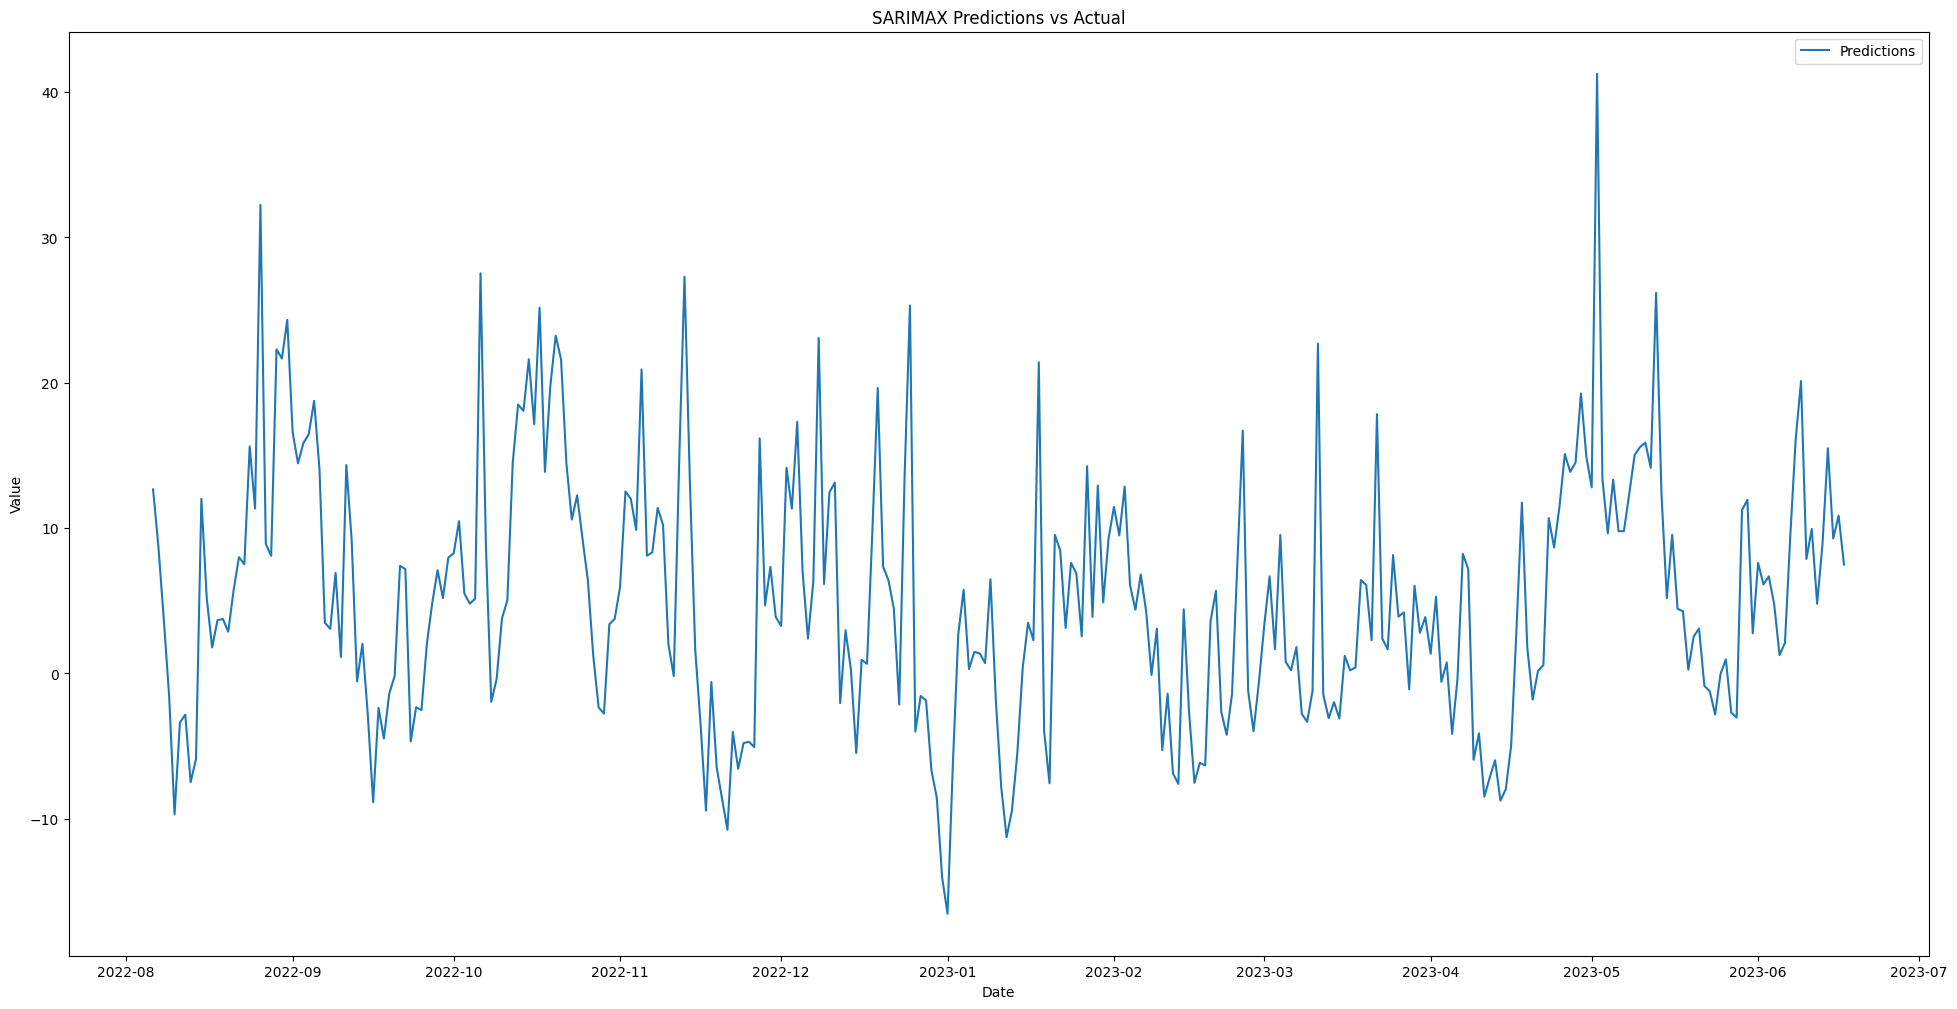

In [ ]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, predictions, label='Predictions')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

Lets create Sarima model

In [ ]:
import numpy as np
# Extract time series data
sarima_data = Ratnapura.loc[:, ['rain_sum']]

sarima_array = np.asarray(sarima_data)


In [ ]:
train_size = int(len(sarima_data) * 0.75)
train_sarima = sarima_data[:train_size]
test_sarima = sarima_data[train_size:]

In [ ]:
test_sarima.shape

(316, 1)

In [ ]:
train_sarima.shape

(948, 1)

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np


# Define and fit SARIMA model
p, d, q = 1, 0, 7 # ARIMA parameters
P, D, Q, s =7, 0, 7, 182   # Seasonal parameters
model = SARIMAX(train_sarima, order=(p, d, q), seasonal_order=(P, D, Q, s) ,  freq="D")
fitted_model = model.fit()

c:\Users\kasrs\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
#now lets evaluate 

# Make predictions
# Validate the model
validation_forecast = fitted_model.forecast(steps=len(test_sarima))


In [ ]:
forecast = fitted_model.forecast(steps=len(test_sarima))

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(test_sarima, validation_forecast)
mae = mean_absolute_error(test_sarima, validation_forecast)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 78.80237319193526
Mean Absolute Error: 5.900497211627711


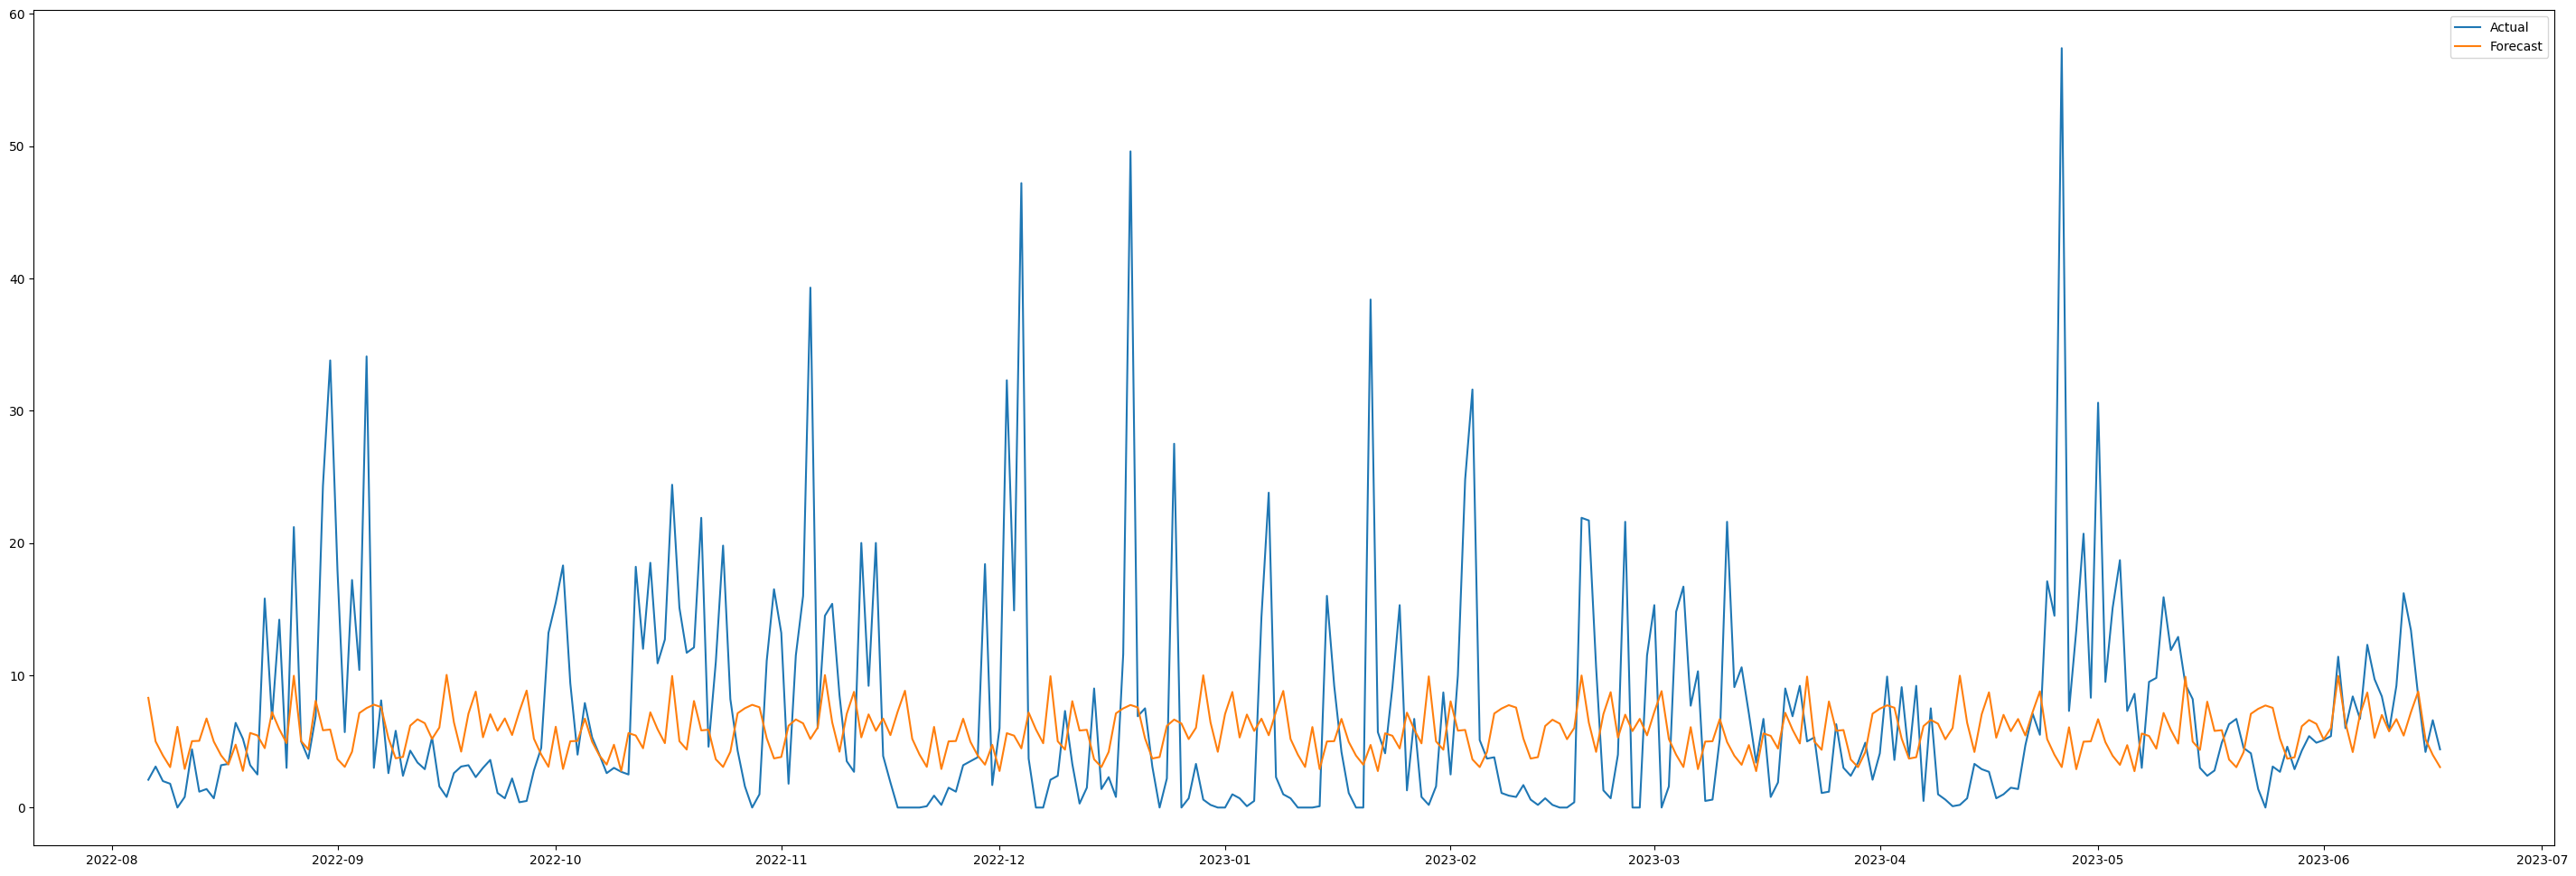

In [ ]:
plt.figure(figsize=(36,12))
plt.plot(test_sarima, label='Actual')
plt.plot(validation_forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             rain_sum   No. Observations:                  948
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 52)   Log Likelihood               -3475.217
Date:                              Tue, 09 Apr 2024   AIC                           6958.434
Time:                                      11:34:12   BIC                           6977.851
Sample:                                  01-01-2020   HQIC                          6965.833
                                       - 08-05-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3806      0.020     19.361      0.000       0.342       0.419
ar.S.L52       0.9984      0.020     49.447      0.000       0.959       1.038
ma.S.L52      -0.9730      0.170     -5.718      0.000      -1.306      -0.639
sigma2        83.9729     11.149      7.532      0.000      62.122     105.824
===================================================================================
Ljung-Box (L1) (Q):                  11.18   Jarque-Bera (JB):             13174.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             3.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NOW LETS CREATE FUTRE PREDITIONS

In [ ]:
predictions_sarima = fitted_model.predict(len(sarima_data), len(sarima_data)+50)
predictions_sarima.head(50)

2023-06-18    6.059918
2023-06-19    2.893961
2023-06-20    4.971904
2023-06-21    4.995926
2023-06-22    6.668940
2023-06-23    4.937460
2023-06-24    3.904819
2023-06-25    3.221104
2023-06-26    4.709975
2023-06-27    2.743133
2023-06-28    5.586160
2023-06-29    5.400116
2023-06-30    4.445522
2023-07-01    7.139201
2023-07-02    5.867887
2023-07-03    4.828482
2023-07-04    9.866554
2023-07-05    4.976648
2023-07-06    4.350461
2023-07-07    7.990795
2023-07-08    5.784383
2023-07-09    5.839958
2023-07-10    3.622276
2023-07-11    3.044652
2023-07-12    4.178618
2023-07-13    7.073334
2023-07-14    7.446919
2023-07-15    7.704196
2023-07-16    7.522272
2023-07-17    5.194084
2023-07-18    3.685120
2023-07-19    3.792439
2023-07-20    6.135104
2023-07-21    6.606228
2023-07-22    6.314646
2023-07-23    5.143573
2023-07-24    5.991341
2023-07-25    9.932978
2023-07-26    6.388796
2023-07-27    4.185637
2023-07-28    7.026562
2023-07-29    8.680025
2023-07-30    5.261795
2023-07-31 

In [ ]:
predictions_sarima.to_csv('ratnapura_final_predicitons.csv')